In [88]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [90]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [91]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [92]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data)
df_market_data_scaled[0:2]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211]])

In [93]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled)

# Copy the crypto names from the original data
df_market_data_scaled.columns = df_market_data.columns

# Set the coinid column as index
df_market_data_scaled.index = df_market_data.index

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [94]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [95]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters = i, random_state = 0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)


C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [96]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_original = pd.DataFrame(elbow_data)
df_elbow_original

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


In [97]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

original_elbow = df_elbow_original.hvplot.line(x="k",
                     y="inertia",
                     title="Elbow Curve (Original)",
                     xticks=k)

original_elbow.opts(width=500, height=400)  # Adjust width and height as needed


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

** The best value for K is 4. This is because the gradient of the graph decreases after k=4. This means that any increase in the number of clusters does not significantly decrease the inertia i.e. the sum of the squares between the centroids and the data points. A k value of 3 and 5 were analysed and 4 provided the best clustering - picking out the outliers correctly.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [98]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [99]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [100]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_used = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_used

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [101]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data_scaled.copy()

In [102]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions["clusters"]=k_used

# Display sample data
df_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [103]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
original_clusters = df_market_data_predictions.hvplot.scatter(x="price_change_percentage_24h",
                     y="price_change_percentage_7d",
                     by = "clusters",
                     hover_cols = "coin_id",
                     title="Clustering using all dimensions")
original_clusters.opts(width=500, height=400)

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [104]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [105]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_market_data_scaled_pca = pca.fit_transform(df_market_data_scaled)


# View the first five rows of the DataFrame. 
df_market_data_scaled_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [106]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 89.5% (37.2% + 34.7% + 17.6%) of the total variance is is explained by the 3 PCA variables.

In [107]:
# Create a new DataFrame with the PCA data.
df_market_data_scaled_pca = pd.DataFrame(df_market_data_scaled_pca,columns=["PC1","PC2","PC3"])

# Copy the crypto names from the original data
df_market_data_scaled_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled_pca = df_market_data_scaled_pca.set_index("coin_id")

# Display sample data
df_market_data_scaled_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [108]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [109]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters = i)
    k_model.fit(df_market_data_scaled_pca)
    inertia.append(k_model.inertia_)


C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [110]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)
df_elbow_pca


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.134056
7,8,17.091637
8,9,13.668325
9,10,10.559358


In [111]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow = df_elbow_pca.hvplot.line(x="k",
                     y="inertia",
                     title="Elbow Curve (PCA)",
                     xticks=k)
pca_elbow.opts(width=500, height=400)  # Adjust width and height as needed


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:  The best value for k is 4. This is because the gradient of the graph decreases significantly after k=4. This means that any increase in the number of clusters does not significantly decrease the inertia i.e. the sum of the squares between the centroids and the data points. A k value of 3 and 5 were analysed and 4 provided the best clustering - picking out the outliers correctly.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No, the optimal number of clusters is still 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [112]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [113]:
# Fit the K-Means model using the PCA data
model.fit(df_market_data_scaled_pca)

C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [114]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_used = model.predict(df_market_data_scaled_pca)

# Print the resulting array of cluster values.
k_used

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1])

In [115]:
# Create a copy of the DataFrame with the PCA data
df_market_data_predictions_pca = df_market_data_scaled_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions_pca["Cluster"] = k_used

# Display sample data
df_market_data_predictions_pca.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [116]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_clusters = df_market_data_predictions_pca.hvplot.scatter(x="PC1",
                     y="PC2",
                     by = "Cluster",
                     hover_cols = "coin_id",
                     title = "Clustering using reduced dimensions")
pca_clusters.opts(width=500, height=400)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [117]:
# Composite plot to contrast the Elbow curves
composite_elbow = original_elbow + pca_elbow
composite_elbow


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

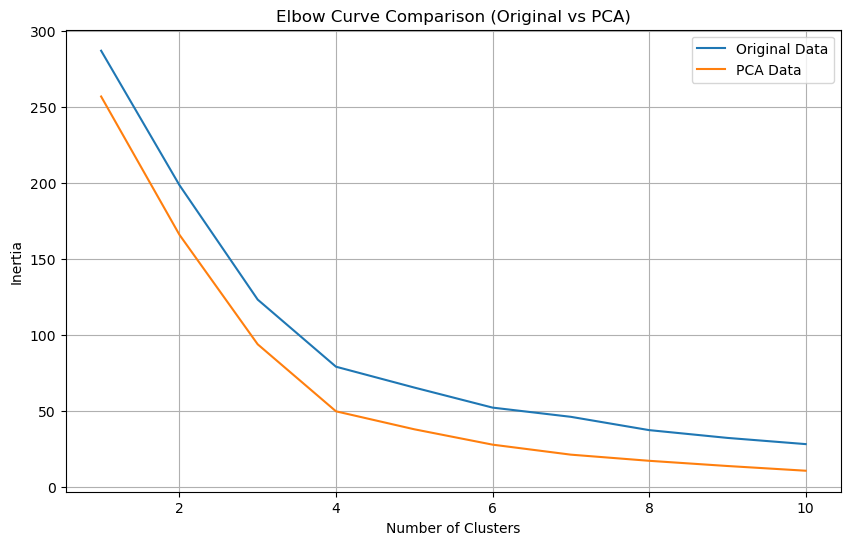

In [118]:
# Create DataFrame for elbow curves
elbow_data = pd.DataFrame({
    'Clusters': range(1, 11),
    'Inertia_Original': df_elbow_original["inertia"],
    'Inertia_PCA': df_elbow_pca["inertia"]
})

plt.figure(figsize=(10, 6))
plt.plot(elbow_data['Clusters'], elbow_data['Inertia_Original'], label='Original Data')
plt.plot(elbow_data['Clusters'], elbow_data['Inertia_PCA'], label='PCA Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison (Original vs PCA)')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
# Composite plot to contrast the clusters
composite_clusters = original_clusters + pca_clusters
composite_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: The clustering is not exactly the same as the reduced dimensionality of the PCA fit produces slightly different data points. However the clustering seems similar in that there are two large clusters with the points overlapping somewhat and the outliers have been identified and put into different clusters. The original clustering with larger dimensionality however identifies a point close to the others, which it puts into a separate cluster (cluster 2), a distinction not fully captured by the reduced dimensionality fit. This discrepancy may stem from the clustering's reliance on dimensions overlooked by the PCA fit."